# OPTIMAL TAX ON BUSINESS

## Load files and packages


In [153]:
using CSV, DataFrames, Statistics, Plots, PrettyTables
include("OCModelE.jl")
include("OCModelE_transition.jl")  # defines compute_FO_transition_path


compute_FO_transition_path (generic function with 2 methods)

## Read CSVs

In [154]:

# Set path and load data
path = "/Users/bhandari/Dropbox/optimal_business_taxation/noncompliance/Approximation Code/"
cd(path)
#df = CSV.read(path*"grid_results_with_values.csv", DataFrame)

# run the part below if u want to have just ran a new set of cases
files = filter(f -> occursin(r"^case_\d+\.\d+_\d+\.\d+\.csv$", f), readdir(path))

# Read all matching files into a vector of DataFrames
dfs = [CSV.read(joinpath(path, file), DataFrame) for file in files]

# Optionally, combine into a single DataFrame (if same structure)
df= vcat(dfs...)
CSV.write("grid_results_with_values.csv", df)



"grid_results_with_values.csv"

In [155]:
df

Row,τb,τw,r,tr,diffv,diffasset,diffgbc,Rss,Wss,Trss,Frac_bss,Vss,Ass,Css,value
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,0.235714,0.4,0.0409916,0.69814,8.96164e-5,3.2053e-5,-1.0908e-5,1.04099,1.15974,0.69814,0.220774,-69.0168,13.4743,1.77257,-69.0439
2,0.271429,0.4,0.0411376,0.715325,8.19726e-5,4.08047e-6,-1.32088e-6,1.04114,1.15709,0.715325,0.210445,-68.8494,13.5162,1.78097,-68.9017
3,0.2,0.4,0.0408373,0.680251,8.92319e-5,2.18963e-5,-7.94381e-6,1.04084,1.16256,0.680251,0.230971,-69.1956,13.432,1.76379,-69.1957
4,0.307143,0.4,0.0412768,0.731675,8.77318e-5,8.70038e-5,-2.88056e-5,1.04128,1.15458,0.731675,0.2,-68.6947,13.5589,1.78891,-68.771
5,0.342857,0.4,0.0414094,0.747129,8.14872e-5,4.47668e-5,-1.66721e-5,1.04141,1.15219,0.747129,0.189402,-68.5552,13.5991,1.79627,-68.6515
6,0.378571,0.4,0.0415375,0.761591,8.1153e-5,6.14517e-5,-2.64297e-5,1.04154,1.14989,0.761591,0.178591,-68.431,13.6391,1.80301,-68.5447
7,0.414286,0.4,0.0416625,0.775002,0.0102194,8.08842e-5,-4.14442e-5,1.04166,1.14766,0.775002,0.167476,-68.3232,13.6786,1.80908,-68.4507
8,0.45,0.4,0.041786,0.78729,0.0132002,1.55813e-6,-1.10005e-6,1.04179,1.14547,0.78729,0.155985,-68.233,13.7166,1.81444,-68.3698
9,0.485714,0.4,0.0419107,0.798308,0.021999,2.65181e-5,-2.92004e-5,1.04191,1.14326,0.798308,0.144089,-68.1614,13.7558,1.81906,-68.3034


In [156]:
# df = filter(:value => x -> !isnan(x), df)

# df.ratioV=abs.(df.value./df.Vss .-1)
# # truncate on outliers
# mean(df.ratioV)

# sel= (df.ratioV .<.max(df.ratioV))
# df=df[sel, :]




## Plot optimal $\tau_{b}$

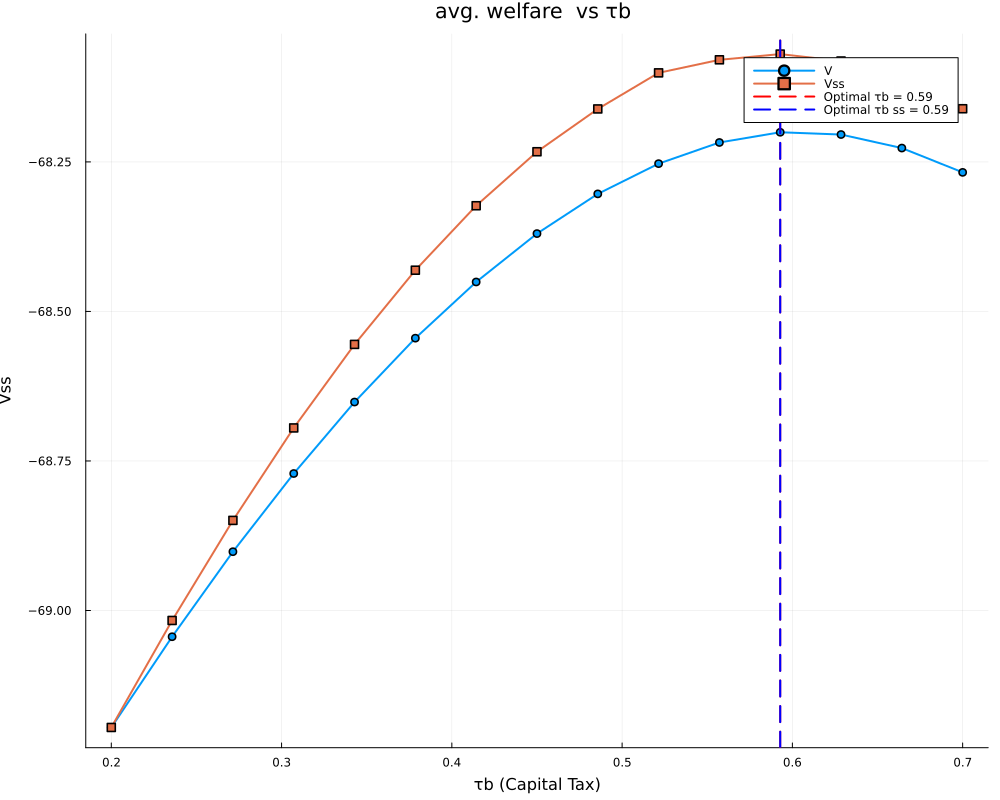

In [157]:

function plot_value_vs_taub(df)
    # Load and clean data
    df_sub = filter(:value => x -> !isnan(x), df)

    sort!(df_sub, :τb)

    # Find τb with maximum value
    idx_max = argmax(df_sub.value)
    best_taub = df_sub[idx_max, :τb]
    best_val = df_sub[idx_max, :value]


    # Find τb with maximum value
    idx_max_ss = argmax(df_sub.Vss)
    best_taub_ss = df_sub[idx_max_ss, :τb]
    best_val_ss = df_sub[idx_max_ss, :Vss]


    # Plot value vs τb and vertical line
    plot(df_sub.τb, df_sub.value,
         marker = :circle, label = "V",
         xlabel = "τb (Capital Tax)", ylabel = "V",
         title = "avg. welfare  vs τb ", grid = true)
        # Plot value vs τb and vertical line
        plot!(df_sub.τb, df_sub.Vss,
        marker = :square, label = "Vss",
        xlabel = "τb (Capital Tax)", ylabel = "Vss",
        title = "avg. welfare  vs τb ", grid = true)
    
    vline!([best_taub], linestyle = :dash, color = :red, label = "Optimal τb = $(round(best_taub, digits=2))")
    vline!([best_taub_ss], linestyle = :dash, color = :blue, label = "Optimal τb ss = $(round(best_taub_ss, digits=2))")

end

# Example usage
plot_value_vs_taub(df)


df_sub = filter(:value => x -> !isnan(x), df)


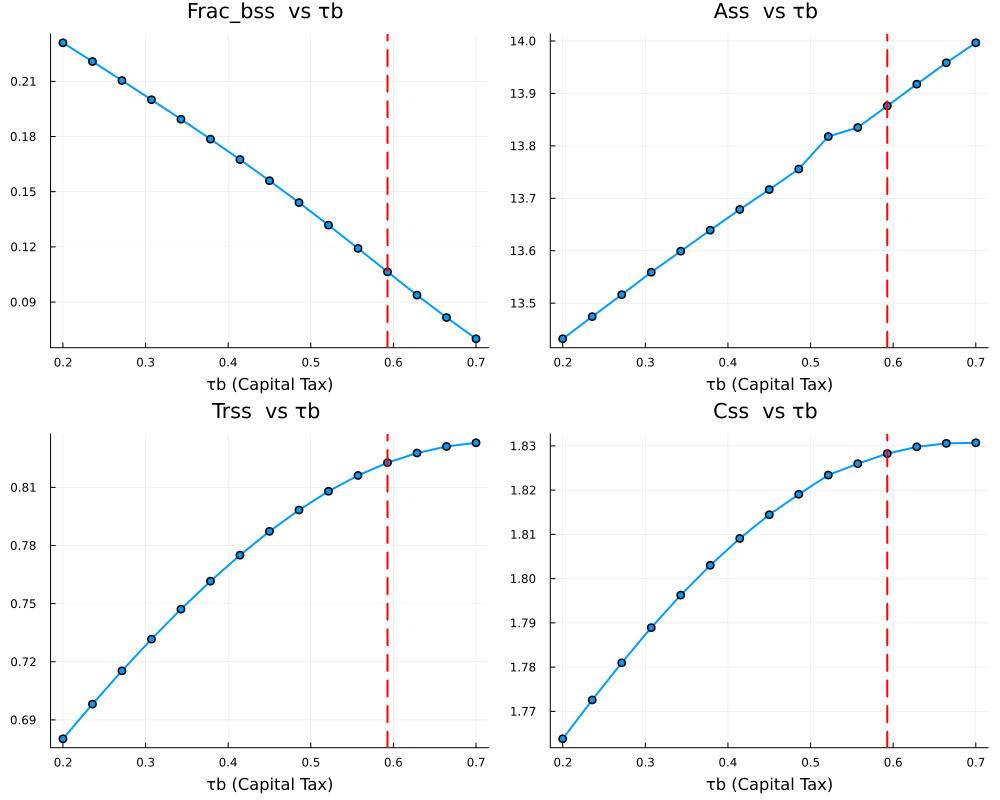

In [158]:

function plot_col_vs_taub(df,col)
    # Load and clean data
    df_sub = filter(:value => x -> !isnan(x), df)

    sort!(df_sub, :τb)

    # Find τb with maximum value
    idx_max = argmax(df_sub.value)
    best_taub = df_sub[idx_max, :τb]
    best_val = df_sub[idx_max, :value]



    # Plot value vs τb and vertical line
    plot(df_sub.τb, df_sub[!,col],
         marker = :circle, label=false,
         xlabel = "τb (Capital Tax)",
         title = "$(col)  vs τb ", grid = true)
    vline!([best_taub], linestyle = :dash, color = :red,label=false)

end

# Example usage
p1=plot_col_vs_taub(df,:Frac_bss)
p2=plot_col_vs_taub(df,:Ass)
p3=plot_col_vs_taub(df,:Trss)
p4=plot_col_vs_taub(df,:Css)
plot(p1,p2,p3,p4)


In [ ]:
df_sub = filter(:value => x -> !isnan(x), df)
sort!(df_sub, :τb)
# Find τb with maximum value
idx_max = argmax(df_sub.value)
τb_val = df_sub[idx_max,:τb]
τw_val = df_sub[idx_max,:τw]
df_trans,sol,OCM_,OCM = compute_FO_transition_path(τb_val, τw_val);


setting up the initial ss...
      Using bisection method
      Using newton method
      Interest rate       4.08, Govt transfer       0.68
      Asset market   2.190e-05, Govt budget   -7.944e-06

....done
                    OC Model Results

      Case Parameters
    -------------------------------------------
      τᵇ (Capital tax)           0.20
      τʷ (Labor tax)             0.40
      χ  (max leverage parameter)   1.05

      Equilibrium values and residuals
    -------------------------------------------
      Interest rate             4.08%
      Government transfer       0.68
      Asset market residual     2.19e-05
      Government budget        -7.94e-06


      Incomes (%GDP)            Products             
    -------------------------------------------------
      Sweat            11.2  |  Consumption      69.1
      Compensation     45.1  |  Investment       24.9
      Capital income   43.7  |  Defense           5.9
    ----------------------------------------------

In [ ]:


# Set defaults
default(linewidth = 2, size = (1000, 800), legend = :topright)

# Individual plots
p1 = plot(df_trans.t, df_trans.A,       ylabel = "Capital (A)",            xlabel = "Time", label = "")
p2 = plot(df_trans.t, df_trans.Frac_b,  ylabel = "Fraction Self-Employed", xlabel = "Time", label = "")
p3 = plot(df_trans.t, df_trans.W,       ylabel = "Wage (W)",                xlabel = "Time", label = "")
p4 = plot(df_trans.t, df_trans.C,       ylabel = "Consumption (C)",         xlabel = "Time", label = "")
p5 = plot(df_trans.t, df_trans.R,       ylabel = "Interest Rate (R)",       xlabel = "Time", label = "")
p6 = plot(df_trans.t, df_trans.Tr,      ylabel = "Transfers (Tr)",          xlabel = "Time", label = "")

# Combine into 3×2 layout without subplot titles
plot(p1, p2, p3, p4, p5, p6, layout = (3, 2))
